## TA-Lib With Machine Learning For Trading Strategies
https://www.youtube.com/watch?v=QP8h0BtSxZM

In [2]:
# !pip install mpl_finance 

In [3]:
from copy import copy
import talib
import pandas as pd
# import mplfinance
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

from sklearn.linear_model import LinearRegression, LogisticRegression

plt.style.use('ggplot')

c:\Users\erkun\anaconda3\envs\py38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [4]:
def candlesticks (df, w=1, format = '%d-%m-%Y') :
    prices = copy(df.dropna())
    prices.reset_index (inplace = True)
    if 'date' in prices:
        prices['date'] = prices['date'].apply(mpl_dates.date2num)
    else:
        prices ['Datetime'] = prices['Datetime'].apply(mpl_dates.date2num)
    try:
        del prices['adj_close']
        del prices ['volume']
        del prices ['tic']
    except :
        pass
    fig, ax = plt.subplots ( figsize =[10,7])
    candlestick_ohlc(ax, prices.values, width=w, colorup='green', colordown='red' , alpha=0.8)
    date_format = mpl_dates.DateFormatter(format)
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

In [5]:
tickers_list = ['AAPL']
df_tic = pd.read_hdf("datasets/df_SnP_500_ohlcv.h5", "df", mode = 'r')
df_tic = df_tic[df_tic['tic'].isin(tickers_list)]

start_date = '2020-03-01'
end_date = '2023-10-10'
df_tic['date'] = pd.to_datetime(df_tic['date'])
df_tic = df_tic[df_tic['date']>pd.to_datetime(start_date)]

df_tic = df_tic.set_index('date')

In [6]:
df_tic

,tic,open,high,low,close,adj_close,volume
date,,,,,,,
2020-03-02,AAPL,70.570000,75.360001,69.430000,74.702499,73.046402,341397200.0
2020-03-03,AAPL,75.917503,76.000000,71.449997,72.330002,70.726501,319475600.0
2020-03-04,AAPL,74.110001,75.849998,73.282501,75.684998,74.007118,219178400.0
2020-03-05,AAPL,73.879997,74.887497,72.852501,73.230003,71.606537,187572800.0
2020-03-06,AAPL,70.500000,72.705002,70.307503,72.257500,70.655609,226176800.0
...,...,...,...,...,...,...,...
2023-10-04,AAPL,171.089996,174.210007,170.970001,173.660004,173.660004,53020300.0
2023-10-05,AAPL,173.789993,175.449997,172.679993,174.910004,174.910004,48527900.0
2023-10-06,AAPL,173.800003,177.990005,173.179993,177.490005,177.490005,57224100.0


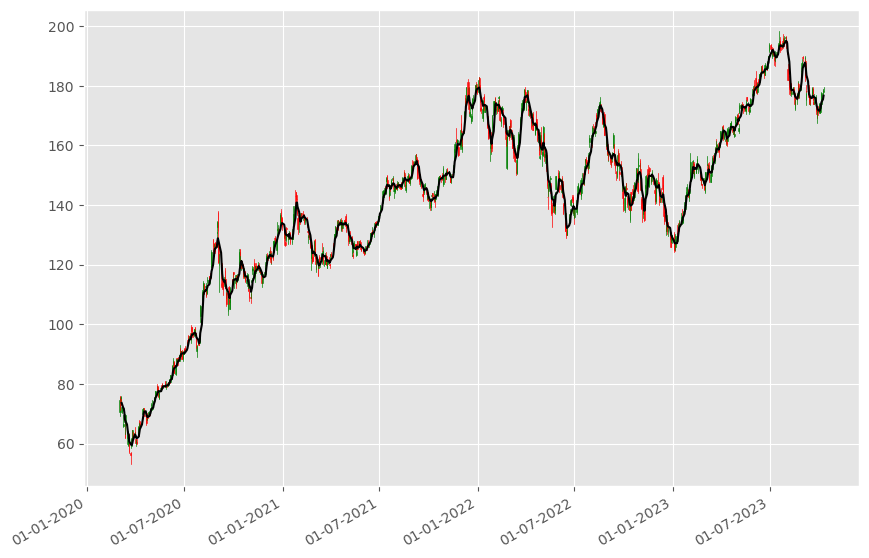

In [7]:
sma = talib.SMA(df_tic.close, 5)
candlesticks(df_tic)
plt.plot(sma,'k')

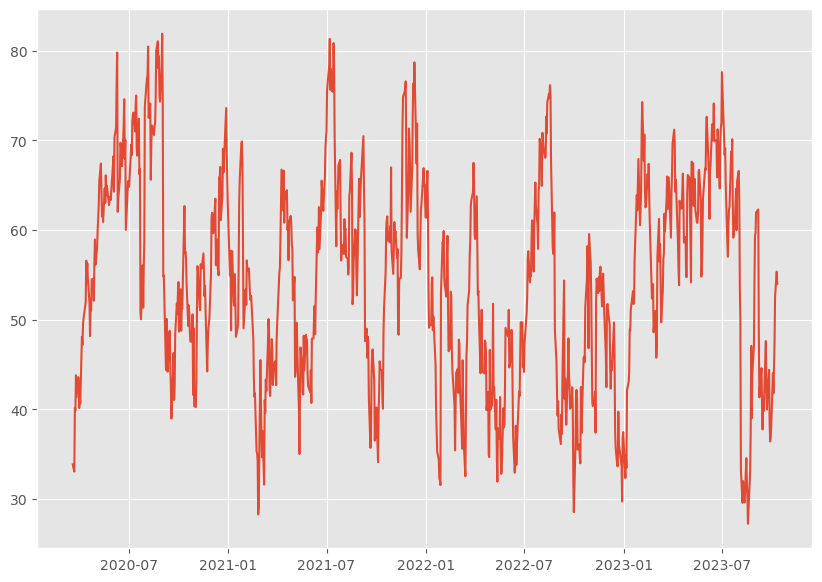

In [8]:
plt.figure(figsize=[10,7])
rsi = talib.RSI(df_tic.close,14)
plt.plot(rsi)

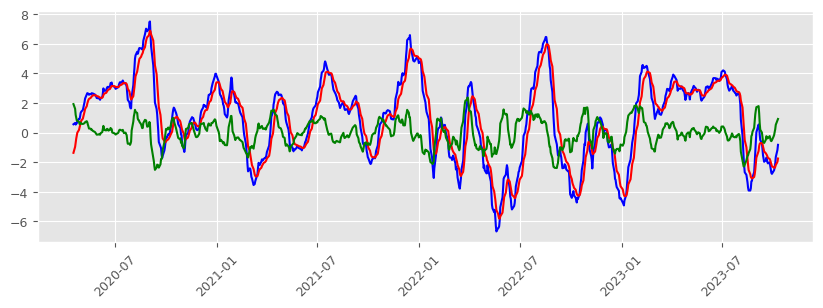

In [9]:
macd, sig, hist = talib.MACD(df_tic.close,12,26,9)
plt.figure(figsize=[10,3])
plt.xticks(rotation=45,fontsize = 9)
plt.yticks(fontsize = 9)
plt.plot(macd,'b-',sig,'r-',hist,'g-')

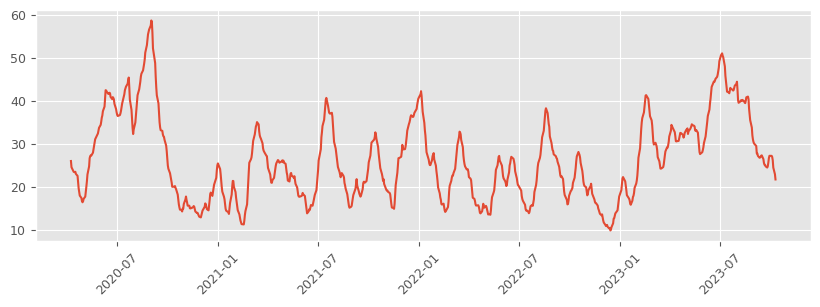

In [10]:
adx = talib. ADX (df_tic.high, df_tic.low, df_tic.close, 14)
plt.figure ( figsize =[10,3])
plt.xticks ( rotation =45, fontsize =9)
plt.yticks ( fontsize =9)
plt.plot ( adx )


In [11]:
dir(talib)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [12]:
def non_streaming (df_tic):
    for i in range(100, len(df_tic)) :
        latest = talib.SMA(df_tic.close.iloc[:i])

def with_streaming (df_tic):
    for i in range (100, len (df_tic)) :
        latest = talib.stream_SMA(df_tic.close.iloc [:i])


In [13]:
%timeit non_streaming(df_tic)

81.1 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%timeit with_streaming(df_tic)

51.1 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Candlestick Pattern

In [15]:
pattern = talib.CDL2CROWS(df_tic.open,df_tic.high,df_tic.low,df_tic.close)

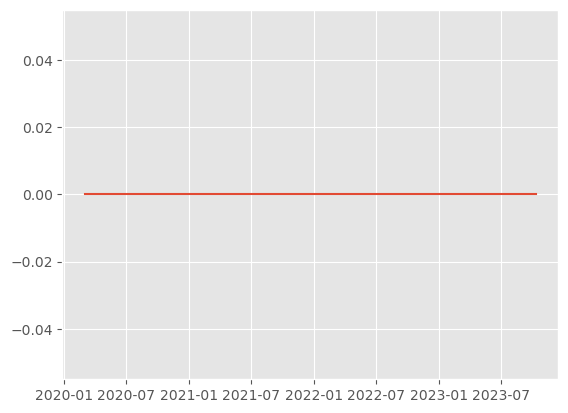

In [16]:
plt.plot(pattern)

In [17]:
results =[ ]
cols=[]
for attr in dir(talib):
    if attr[:3] == 'CDL':
        res = getattr(talib, attr) (df_tic.open, df_tic.high, df_tic.low, df_tic.close)
        results.append (res)
        cols.append(attr)


<AxesSubplot:xlabel='date'>

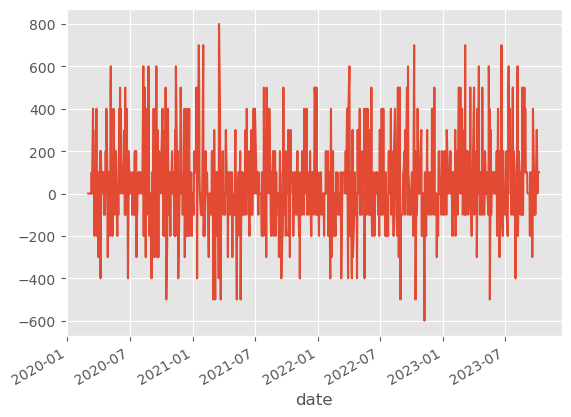

In [18]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns
all_pats = patterns.sum(axis= 1)        # sum of all chart patterns
all_pats.plot()


## Can Candlestick Patterns Predict Daily Returns?
### The "Naive" Way


Text(0.5, 1.0, 'slope: -1.1352181156412928e-06')

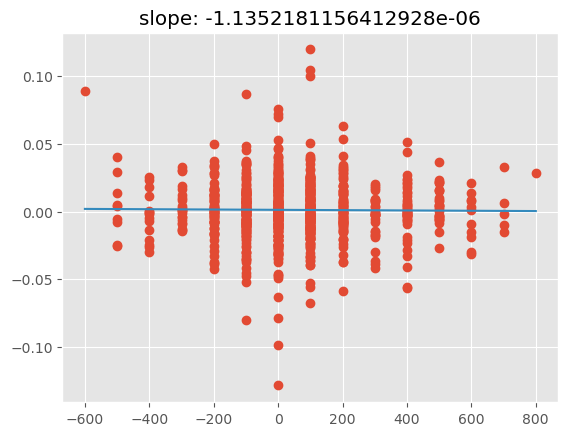

In [19]:
import numpy as np
sft = -1
returns = df_tic.close.pct_change()
plt.plot(all_pats, returns.shift(sft), 'o')
m = np.polyfit(all_pats.iloc[sft+1:-1], returns.shift(sft).iloc[sft+1:-1],1)
xx=np.linspace(min(all_pats),max(all_pats),200)
yy = np.polyval(m,xx)
plt.plot (xx,yy)
plt.title('slope: %s'%m[0])

In [20]:
## Naive Strategy Performance

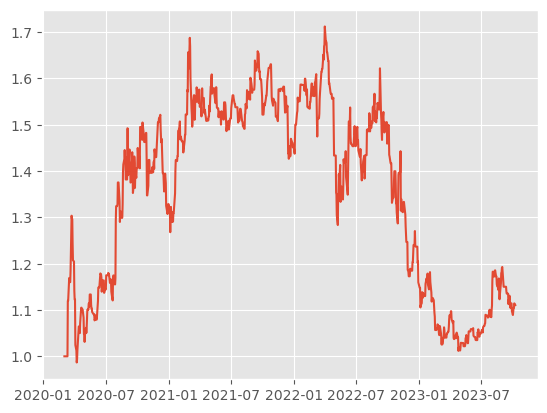

In [21]:

plt.plot((1+(np.sign(all_pats.iloc[sft+1:-1])*returns.shift(sft).iloc[sft+1:-1])).cumprod())

In [22]:
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
2023-10-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-10-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
returns

date
2020-03-02         NaN
2020-03-03   -0.031759
2020-03-04    0.046385
2020-03-05   -0.032437
2020-03-06   -0.013280
                ...   
2023-10-04    0.007309
2023-10-05    0.007198
2023-10-06    0.014750
2023-10-09    0.008451
2023-10-10   -0.003352
Name: close, Length: 910, dtype: float64

In [24]:
sft

-1

## With Machine Leanring

In [25]:
oos =250
model = LinearRegression()
model.fit(patterns.iloc[sft+1:-oos], returns.shift(sft).iloc[sft+1:-oos])
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


LinearRegression()

In [26]:
pred =  model.predict(patterns.iloc[-oos:])

In [27]:
real = returns.shift(sft).iloc[-oos:]

(-0.01, 0.01)

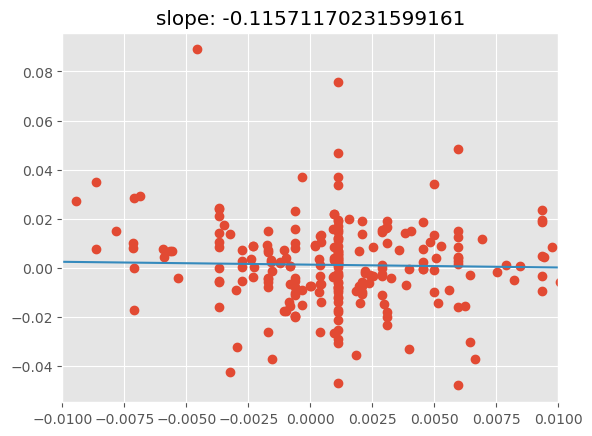

In [28]:
plt.plot (pred, real, 'o')
m=np.polyfit(pred[:-1],real[:-1],1)
xx=np. linspace (min(pred),max(pred),200)
yy=np.polyval(m,xx)
plt.plot ( xx,yy)
plt.title('slope: %s'%m[0])
plt.xlim([-0.01,0.01])


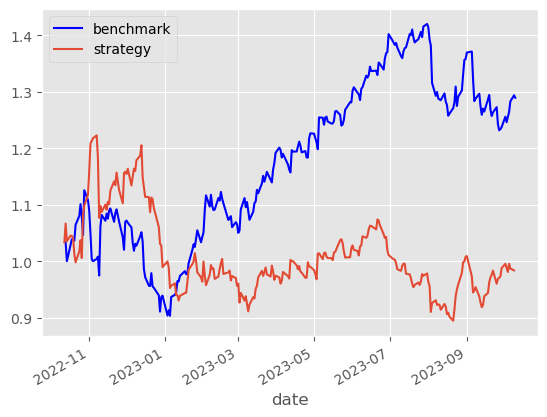

In [30]:
bm = (1+ df_tic.close.iloc[-oos: ].pct_change()).cumprod ()
strat = (1+ real * np.sign(pred)).cumprod()
plt.plot (bm, 'b-' , label= 'benchmark')
strat.plot (label='strategy');
plt. legend ()